# Assignment 1, PHYS 2600
Erin Morissette \
February 11, 2021

## Problem 1 
Write a Python function to calculate CVfor a given material and temperature.Your program should take the density, sample volume, Debye Temperature, tem-perature upper limit, and required accuracy as inputs, and output the heat capac-ity between T = 0 and the upper temperature limit. Use an adaptive Simpson’srule to evaluate the integral to the required accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

In [65]:
kB = 1.38e-23

def integrand(x, power1, power2):
    
    
    f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2
    
    return f


def adap_Simpson(f, start, stop, N, error, args = None):
    
    width = stop - start
    h = width/N
    x = np.arange(start, stop+h, h)
    
      
    S =  (2*f(x[2:-2:2],*args).sum() + f(start,*args) + f(stop,*args)) * 1/3
    
    eps = 10
    T = 0
    
    while eps >= error:
        Fm = h*(S + 2*T)
        S = S + T
        N = 2*N
        h = width/N
        x = np.arange(start, stop+h, h)
        T = f(x[1:-2:2],*args).sum()*(2/3)
        F = h*(S + 2*T)
        eps = (F - Fm)*(1/15)
        
    return F


In [44]:
# Test of adaptive Simpson 
integral = adap_Simpson(polynomial, 0, 10, 100, .001, args = (0,5))
print(integral)

(249.9918640136719, 0.000515272352432324)


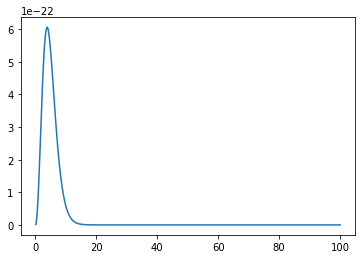

In [47]:
# Plot of integrand - upper limit of integral should be >= 20
x = np.linspace(0.1,100,1000)
plt.plot(x, 9* kB* integrand(x,4,2))

In [ ]:
def Cv(density, volume, temp, tempD, error):
    
    integral = adap_Simpson(integrand, 0.0001, tempD/temp, 1000, error, args = (4,2))
    spec_Cv = 9.0 * kB * (temp/tempD)**3 * integral
    mass = density*volume 
    Cv = mass*spec_Cv
    
    return Cv
    

temperature = np.linspace(1,200,10000)
td1 = 105
td2 = 428
td3 = 2230


lead = []
aluminum = []
diamond = []
for i in temperature:
    lead.append( Cv(11340, 1e-6, i, 105, .001))
    aluminum.append(Cv(2700, 1e-6, i, 428, .001))
    diamond.append(Cv(3520, 1e-6, i, 2230, .001))
    
    


<ipython-input-65-eadb3e33dc44>:6: RuntimeWarning: overflow encountered in square
  f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2
<ipython-input-65-eadb3e33dc44>:6: RuntimeWarning: overflow encountered in double_scalars
  f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2
<ipython-input-65-eadb3e33dc44>:6: RuntimeWarning: overflow encountered in exp
  f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2
<ipython-input-65-eadb3e33dc44>:6: RuntimeWarning: overflow encountered in multiply
  f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2
<ipython-input-65-eadb3e33dc44>:6: RuntimeWarning: invalid value encountered in true_divide
  f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2
<ipython-input-65-eadb3e33dc44>:6: RuntimeWarning: invalid value encountered in double_scalars
  f = (x**power1 * np.exp(x))/(np.exp(x) -1)**power2


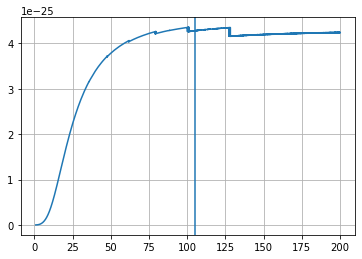

In [101]:
plt.plot(temperature/td1,lead)
plt.plot(temperature/td2, aluminum)
plt.plot(temperature/td3, diamond)
plt.grid()
plt.axvline(x = 105)

In [82]:
Cv(1,1,1.,20.,.001)

1.6125442024779857e-22

1000 mm3, samples of Lead θD= 105 K,Aluminum θD= 428 K, and Diamond θD= 2230 K